## **Carga de librerías.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## **Carga de dataser Mnist y exploración.**

In [ ]:
# Cargar y preprocesar el dataset MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

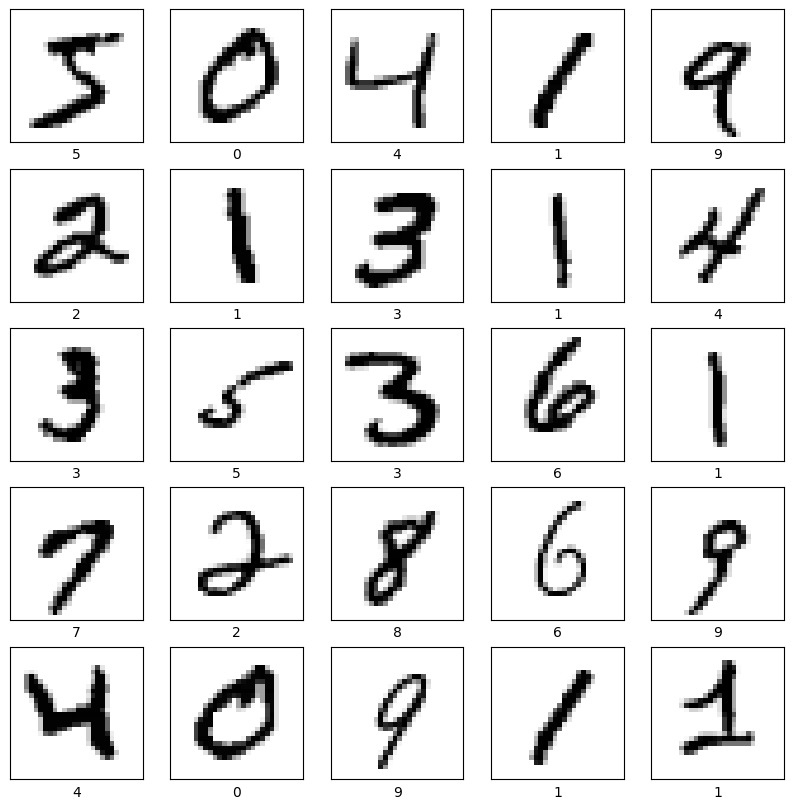

In [ ]:
# Visualización de algunos dígitos de muestra
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

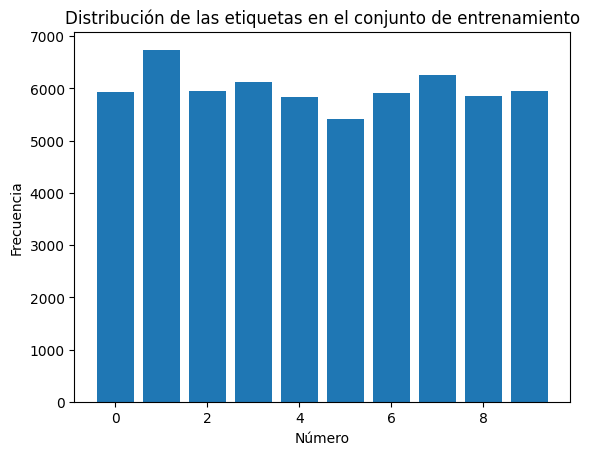

In [ ]:
# Distribución de los dígitos en el set de entrenamiento
plt.bar(range(10), np.bincount(y_train))
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.title('Distribución de las etiquetas en el conjunto de entrenamiento')
plt.show()

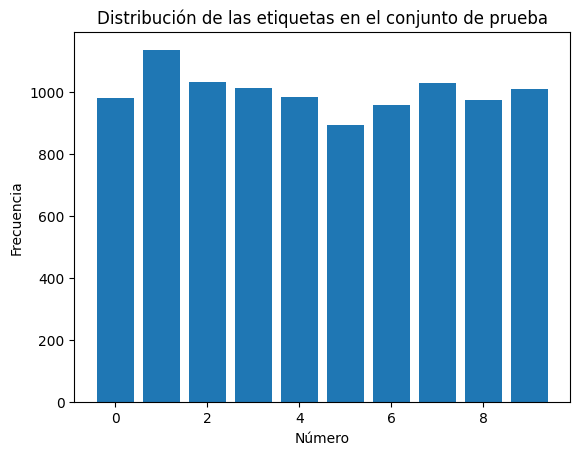

In [ ]:
# Distribución de los dígitos en el set de prueba
plt.bar(range(10), np.bincount(y_test))
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.title('Distribución de las etiquetas en el conjunto de prueba')
plt.show()

## **Preprocesamiento del dataset.**

In [ ]:
# Normalizar los valores de píxeles a [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Cambiar la forma de los datos para la red neuronal (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Convertir las etiquetas a one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## **Arquitectura de la red convolucional.**

### **Modelo 1.**

In [ ]:
# Definir el modelo de la red neuronal
model_1 = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compilar el modelo
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Mostrar resumen del modelo
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def get_neurons(model):

    input_neurons = (model.layers[0].input.shape[1] *
                     model.layers[0].input.shape[2] *
                     model.layers[0].input.shape[3])

    print(f'Total de neuronas de la capa de entrada: {input_neurons}')

    for layer in model.layers:
        if isinstance(layer, layers.Conv2D):
            if layer.padding == 'valid':
                padding = 0

            strides = layer.strides
            kernel_size = layer.kernel_size
            filters = layer.filters
            out_heigt = ((layer.input.shape[1] + 2 * padding - kernel_size[0]) // strides[0]) + 1
            out_width = ((layer.input.shape[2] + 2 * padding - kernel_size[1]) // strides[1]) + 1
            total_neurons = out_heigt * out_width * filters

            print(f'Total de neuronas de la capa {layer.name}: {total_neurons}')

In [ ]:
get_neurons(model_1)

Total de neuronas de la capa de entrada: 784
Total de neuronas de la capa conv2d: 10816
Total de neuronas de la capa conv2d_1: 3872


In [ ]:
model_1.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
# Entrenamiento el modelo
history_1 = model_1.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.8602 - loss: 0.4953 - val_accuracy: 0.9784 - val_loss: 0.0749
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9775 - loss: 0.0696 - val_accuracy: 0.9840 - val_loss: 0.0537
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9858 - loss: 0.0437 - val_accuracy: 0.9837 - val_loss: 0.0534
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9881 - val_loss: 0.0429
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.9877 - val_loss: 0.0458
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9930 - loss: 0.0205 - val_accuracy: 0.9867 - val_loss: 0.0448
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9895 - val_loss: 0.0421
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9959 - loss: 0.0125 - 

In [ ]:
print(history_1.history)

{'accuracy': [0.9368333220481873, 0.9792083501815796, 0.9854999780654907, 0.9896041750907898, 0.9917500019073486, 0.9931041598320007, 0.9942291378974915, 0.9957500100135803, 0.9963124990463257, 0.9966250061988831, 0.9976041913032532, 0.9974166750907898, 0.9979583621025085, 0.9976875185966492, 0.9986458420753479, 0.9986875057220459, 0.9982083439826965, 0.9985416531562805, 0.9988124966621399, 0.9982083439826965], 'loss': [0.21886377036571503, 0.06531301140785217, 0.04504668712615967, 0.033716171979904175, 0.026171641424298286, 0.021051639690995216, 0.016625240445137024, 0.013102918863296509, 0.01081801950931549, 0.011089297011494637, 0.007446897681802511, 0.007021037396043539, 0.005232386291027069, 0.006288950797170401, 0.0038592962082475424, 0.004080228041857481, 0.0047841062769293785, 0.00437732320278883, 0.002941899234429002, 0.005191173404455185], 'val_accuracy': [0.9784166812896729, 0.984000027179718, 0.9836666584014893, 0.9880833625793457, 0.9877499938011169, 0.9866666793823242, 0.

### **Visualización de los resultados del entrenamiento.**

In [ ]:
# Gráfico de precisión
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión en validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlim(0, len(history.history['accuracy']))
    plt.ylim(0.9, 1)
    plt.xticks(np.arange(0, len(history.history['accuracy']), step=1))
    plt.yticks(np.arange(0.9, 1.01, step=0.01))
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# Gráfico de pérdida
def plot_loss(history):
  plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
  plt.plot(history.history['val_loss'], label='Pérdida en validación')
  plt.title('Pérdida durante el entrenamiento')
  plt.xlim(0, len(history.history['loss']))
  plt.ylim(0, 0.25)
  plt.xticks(np.arange(0, len(history.history['loss']), step=1))
  plt.yticks(np.arange(0, 0.25, step=0.01))
  plt.xlabel('Época')
  plt.ylabel('Pérdida')
  plt.grid(True)
  plt.legend()
  plt.show()

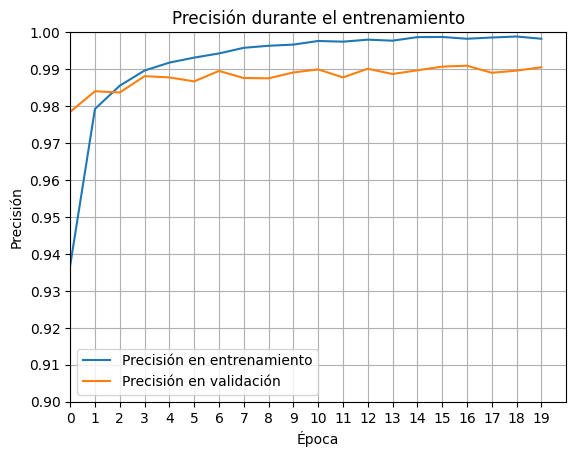

In [ ]:
plot_accuracy(history_1)

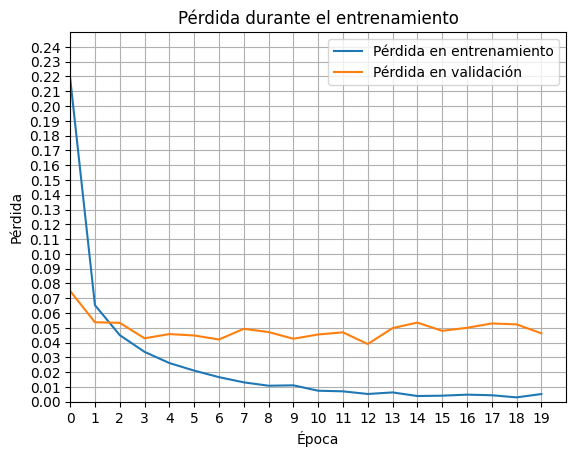

In [ ]:
plot_loss(history_1)

In [ ]:
model_1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9888 - loss: 0.0517


[0.04026952385902405, 0.9912999868392944]

### **Modelo 2.**

In [ ]:
# Definir el modelo de la red neuronal
model_2 = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compilar el modelo
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Mostrar resumen del modelo
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
get_neurons(model_2)

Total de neuronas de la capa de entrada: 784
Total de neuronas de la capa conv2d_2: 21632
Total de neuronas de la capa conv2d_3: 7744


In [ ]:
# Entrenamiento el modelo
history_2 = model_2.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.7733 - loss: 0.7106 - val_accuracy: 0.9716 - val_loss: 0.0932
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9615 - loss: 0.1277 - val_accuracy: 0.9830 - val_loss: 0.0626
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9720 - loss: 0.0984 - val_accuracy: 0.9842 - val_loss: 0.0562
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9780 - loss: 0.0747 - val_accuracy: 0.9872 - val_loss: 0.0472
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 102ms/step - accuracy: 0.9813 - loss: 0.0607 - val_accuracy: 0.9866 - val_loss: 0.0481
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accuracy: 0.9887 - val_loss: 0.0407
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9898 - val_loss: 0.0380
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.9877 - loss: 0

### **Visualización de los resultados del entrenamiento.**

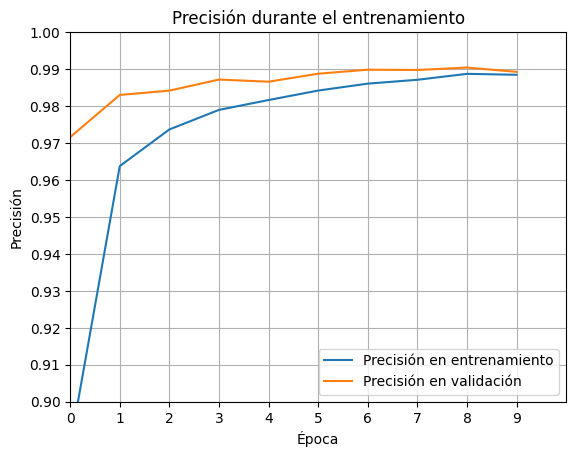

In [ ]:
plot_accuracy(history_2)

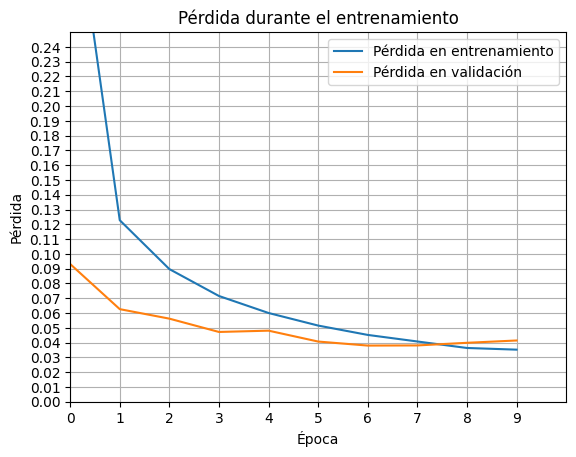

In [ ]:
plot_loss(history_2)

In [ ]:
model_2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9890 - loss: 0.0353


[0.029394058510661125, 0.9904000163078308]

In [ ]:
confusion_matrix = tf.math.confusion_matrix(tf.argmax(y_test, axis=1), tf.argmax(model_2.predict(X_test), axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


## **Predicciones.**

In [ ]:
# 8. Hacer una predicción de ejemplo
sample_image = X_test[0:1]
prediction = model_2.predict(sample_image)
predicted_digit = np.argmax(prediction)
print(f'Número predicho: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Número predicho: 7


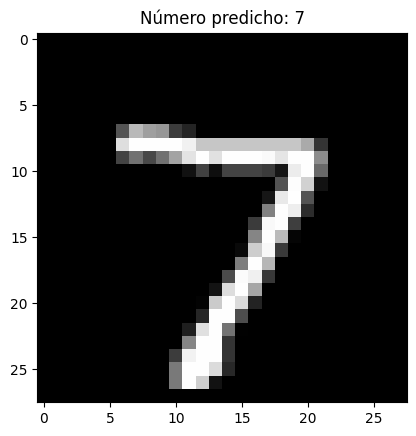

In [ ]:
# Mostrar la imagen de ejemplo
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f'Número predicho: {predicted_digit}')
plt.show()

In [ ]:
# Guardar modelo entrenado
model_2.save('modelo_entrenado.keras')